In [2]:
import pandas as pd


file_path = "../data/processed/val_table_final.csv"


df = pd.read_csv(file_path)
print(df[["chi2", "n_valid"]].describe())
print("Número de anomalies:", df["is_anomaly"].sum(), "/", len(df))


               chi2     n_valid
count  7.850000e+02  785.000000
mean   2.891443e+05  181.210191
std    6.207254e+05   90.518393
min    1.078772e+03   62.000000
25%    1.708963e+04  123.000000
50%    3.053432e+04  137.000000
75%    2.669176e+05  255.000000
max    7.159698e+06  352.000000
Número de anomalies: 40 / 785


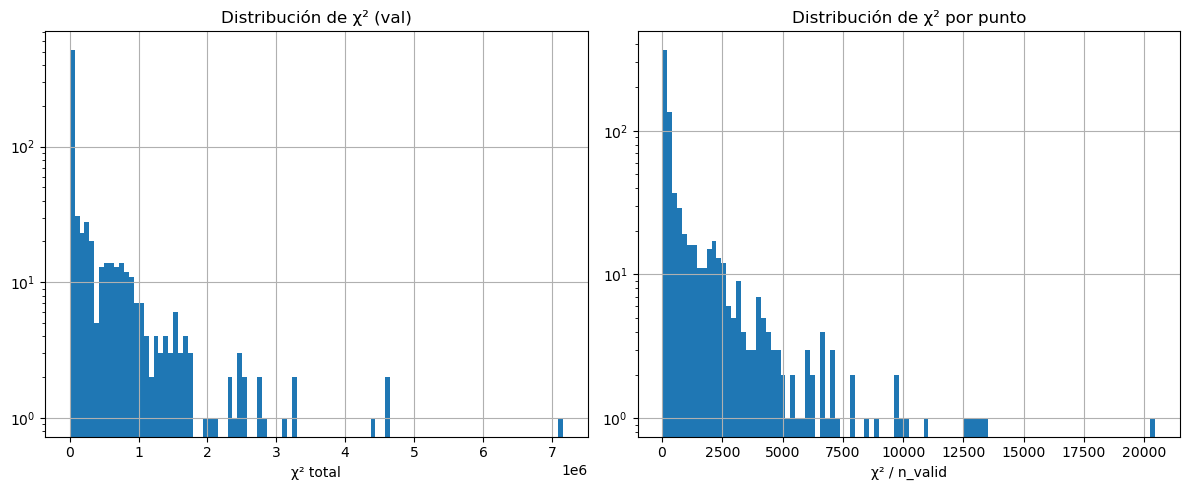

In [3]:
import matplotlib.pyplot as plt

# Crear subplots para mostrar ambos histogramas en una sola figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de chi2 (escala log en y)
df["chi2"].hist(bins=100, log=True, ax=ax1)
ax1.set_title("Distribución de χ² (val)")
ax1.set_xlabel("χ² total")

# Histograma de chi² por punto
df["chi2_per_point"] = df["chi2"] / df["n_valid"]
df["chi2_per_point"].hist(bins=100, log=True, ax=ax2)
ax2.set_title("Distribución de χ² por punto")
ax2.set_xlabel("χ² / n_valid")

plt.tight_layout()
plt.show()


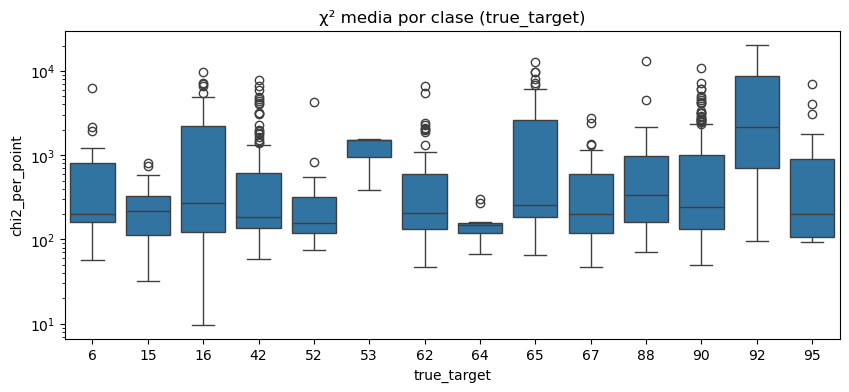

In [ ]:
# Boxplot de chi2_per_point por true_target
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(
    x="true_target",
    y="chi2_per_point",
    data=df
)
plt.yscale("log")
plt.title("χ² media por clase (true_target)")
plt.show()


In [8]:
classes = df["true_target"].unique()
print("Clases únicas en true_target:", classes)

Clases únicas en true_target: [92 90 16 88 65 62 15 42 95 52 67  6 64 53]


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       767
           1       0.00      0.00      0.00        18

    accuracy                           0.93       785
   macro avg       0.49      0.47      0.48       785
weighted avg       0.95      0.93      0.94       785



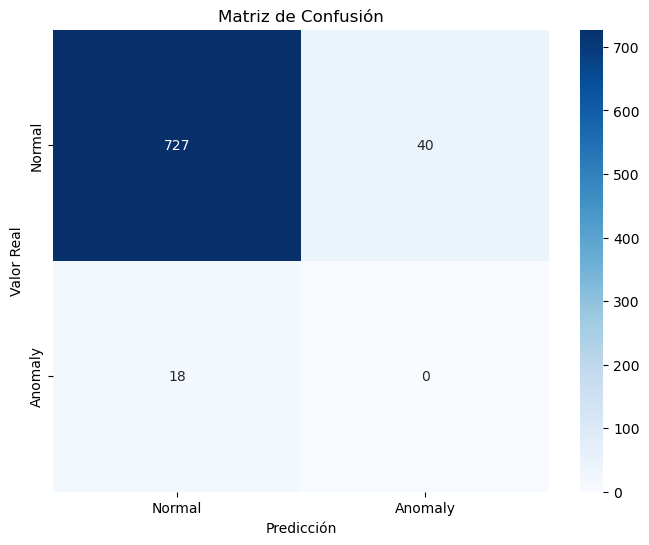

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define tu lista de clases rare:
rare = {53, 6}  # true_target que consideras “Eventos 99”
y_true = df["true_target"].isin(rare).astype(int)
y_pred = df["is_anomaly"]

print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


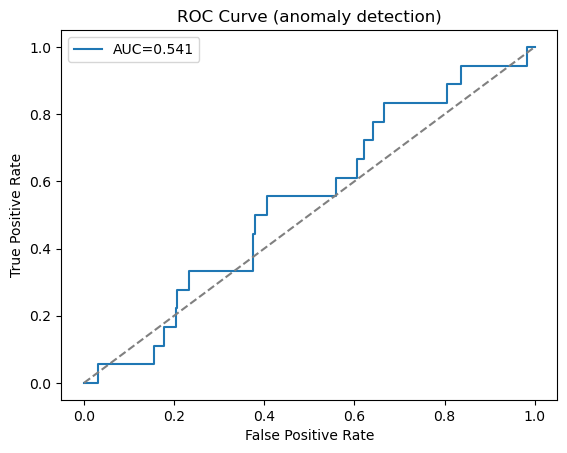

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# score = chi2_per_point, o directamente chi2
scores = df["chi2_per_point"]
fpr, tpr, _ = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (anomaly detection)")
plt.legend()
plt.show()
